# Initial calibration

### Setup

In [3]:
import logging, logging.config
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pickle
import numpy as np
import pandas as pd
import yaml

from simulation_utils.preference import generate_uniform
from simulation_utils.observation import sample_popular_n
from simulation_utils.utils import truncated_beta_binomial, truncated_pareto
from simulation_utils.datasets import ml_100k

import simulation_utils as sims_utils
%matplotlib inline

### Read data

In [2]:
data = ml_100k()
nusers = len(data['user'].unique())
nitems = len(data['item'].unique())

In [4]:
print(nusers, nitems)

943 1682


In [5]:
data.head()

,user,item,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


### Check point

In [6]:
import os
import re

In [7]:
pattern = re.compile('calibrations_unif_pop.*.pkl')
filenames = [fn for fn in os.listdir('build') if pattern.match(fn)]

In [8]:
filenames

['calibrations_unif_pop_2019-02-15-00-56-58.pkl']

In [9]:
results = []
for fn in filenames:
    path = os.path.join('build', fn)
    with open(path, 'rb') as f:
        result = pickle.load(f)
    results.extend(result)

In [10]:
res_df = pd.DataFrame(results)

In [12]:
res_df.head()

,item_popularity_kl_divergence,obs,obs_a,obs_alpha,obs_b,obs_dist_func,obs_m,obs_n,obs_use_cap,pref,pref_frac,pref_nitems,pref_nusers,user_activity_kl_divergence
0,1.736254,sample_popular_n,NaN,0.510528,NaN,truncated_pareto,20.0,NaN,True,generate_uniform,0.028862,1682,943,0.485717
1,1.757043,sample_popular_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_uniform,0.028862,1682,943,0.511623
2,1.880706,sample_popular_n,NaN,0.510528,NaN,truncated_pareto,20.0,NaN,True,generate_uniform,0.104553,1682,943,0.192035
3,1.874749,sample_popular_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_uniform,0.104553,1682,943,0.191626
4,2.009686,sample_popular_n,NaN,0.510528,NaN,truncated_pareto,20.0,NaN,True,generate_uniform,0.247550,1682,943,0.165041


In [13]:
res_df.shape

(40, 14)

In [14]:
res_df[res_df['item_popularity_kl_divergence'] < 2].sort_values(['item_popularity_kl_divergence', 'user_activity_kl_divergence']).head(10)

,item_popularity_kl_divergence,obs,obs_a,obs_alpha,obs_b,obs_dist_func,obs_m,obs_n,obs_use_cap,pref,pref_frac,pref_nitems,pref_nusers,user_activity_kl_divergence
0,1.736254,sample_popular_n,NaN,0.510528,NaN,truncated_pareto,20.0,NaN,True,generate_uniform,0.028862,1682,943,0.485717
1,1.757043,sample_popular_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_uniform,0.028862,1682,943,0.511623
3,1.874749,sample_popular_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_uniform,0.104553,1682,943,0.191626
2,1.880706,sample_popular_n,NaN,0.510528,NaN,truncated_pareto,20.0,NaN,True,generate_uniform,0.104553,1682,943,0.192035
5,1.969880,sample_popular_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_uniform,0.247550,1682,943,0.155738
7,1.977936,sample_popular_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_uniform,0.394749,1682,943,0.156924
13,1.980547,sample_popular_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_uniform,0.440129,1682,943,0.156924
9,1.987892,sample_popular_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_uniform,0.417975,1682,943,0.156924
11,1.991263,sample_popular_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_uniform,0.426074,1682,943,0.156924
15,1.998919,sample_popular_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_uniform,0.542766,1682,943,0.156924


In [15]:
res_df[res_df['item_popularity_kl_divergence'] < 2].sort_values(['user_activity_kl_divergence', 'item_popularity_kl_divergence']).head(10)

,item_popularity_kl_divergence,obs,obs_a,obs_alpha,obs_b,obs_dist_func,obs_m,obs_n,obs_use_cap,pref,pref_frac,pref_nitems,pref_nusers,user_activity_kl_divergence
5,1.969880,sample_popular_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_uniform,0.247550,1682,943,0.155738
7,1.977936,sample_popular_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_uniform,0.394749,1682,943,0.156924
13,1.980547,sample_popular_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_uniform,0.440129,1682,943,0.156924
9,1.987892,sample_popular_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_uniform,0.417975,1682,943,0.156924
11,1.991263,sample_popular_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_uniform,0.426074,1682,943,0.156924
15,1.998919,sample_popular_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_uniform,0.542766,1682,943,0.156924
3,1.874749,sample_popular_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_uniform,0.104553,1682,943,0.191626
2,1.880706,sample_popular_n,NaN,0.510528,NaN,truncated_pareto,20.0,NaN,True,generate_uniform,0.104553,1682,943,0.192035
0,1.736254,sample_popular_n,NaN,0.510528,NaN,truncated_pareto,20.0,NaN,True,generate_uniform,0.028862,1682,943,0.485717
1,1.757043,sample_popular_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_uniform,0.028862,1682,943,0.511623


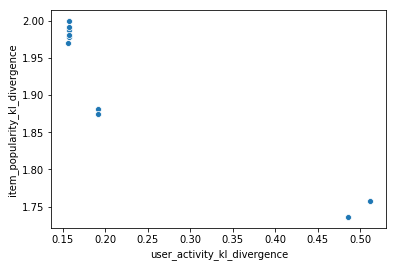

In [16]:
sns.scatterplot('user_activity_kl_divergence', 'item_popularity_kl_divergence', data=res_df[res_df['item_popularity_kl_divergence'] < 2])

### KL divergence vs. parameters

In [17]:
res_df_tall = res_df[['item_popularity_kl_divergence', 'obs_dist_func', 'pref_frac', 'pref_nitems', 'pref_nusers', 'user_activity_kl_divergence']].melt(
    id_vars = ['obs_dist_func', 'pref_frac', 'pref_nitems', 'pref_nusers'],
    value_vars=['item_popularity_kl_divergence', 'user_activity_kl_divergence'],
    var_name = 'statistics',
    value_name = 'score'
)

frac

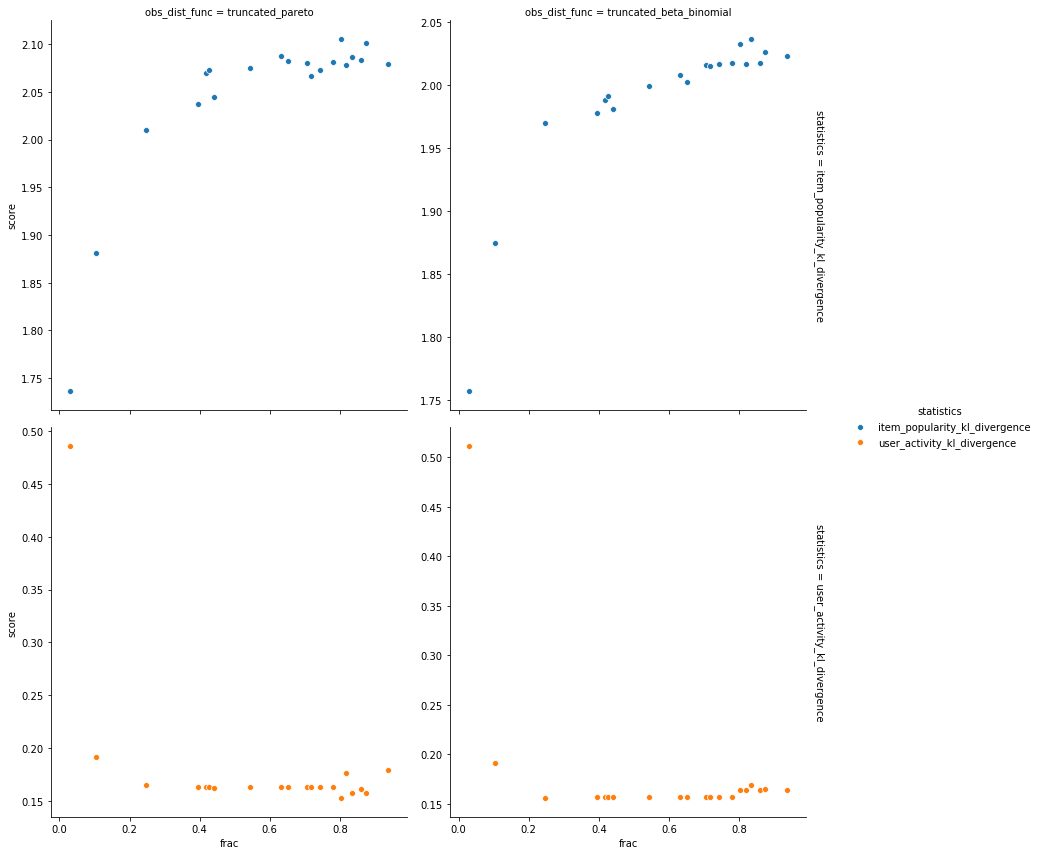

In [18]:
g = sns.FacetGrid(res_df_tall, col='obs_dist_func', hue='statistics', row='statistics', height=6, sharey=False, margin_titles=True)
g = (g.map(sns.scatterplot, 'pref_frac', 'score')
     .add_legend()
     .set_axis_labels('frac', 'score'))

In [19]:
def plot_scatter3d(x, y, z, c, **kwargs):
    ax = plt.gca()
    kwargs.pop('color')
    p = ax.scatter(x, y, z, c=c, **kwargs)
#     plt.colorbar(p, shrink=0.5, aspect=5)
    ax.set_zlabel('c')

In [20]:
cmap_name = None
cmap = plt.get_cmap(cmap_name)
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(res_df_tall['score'])

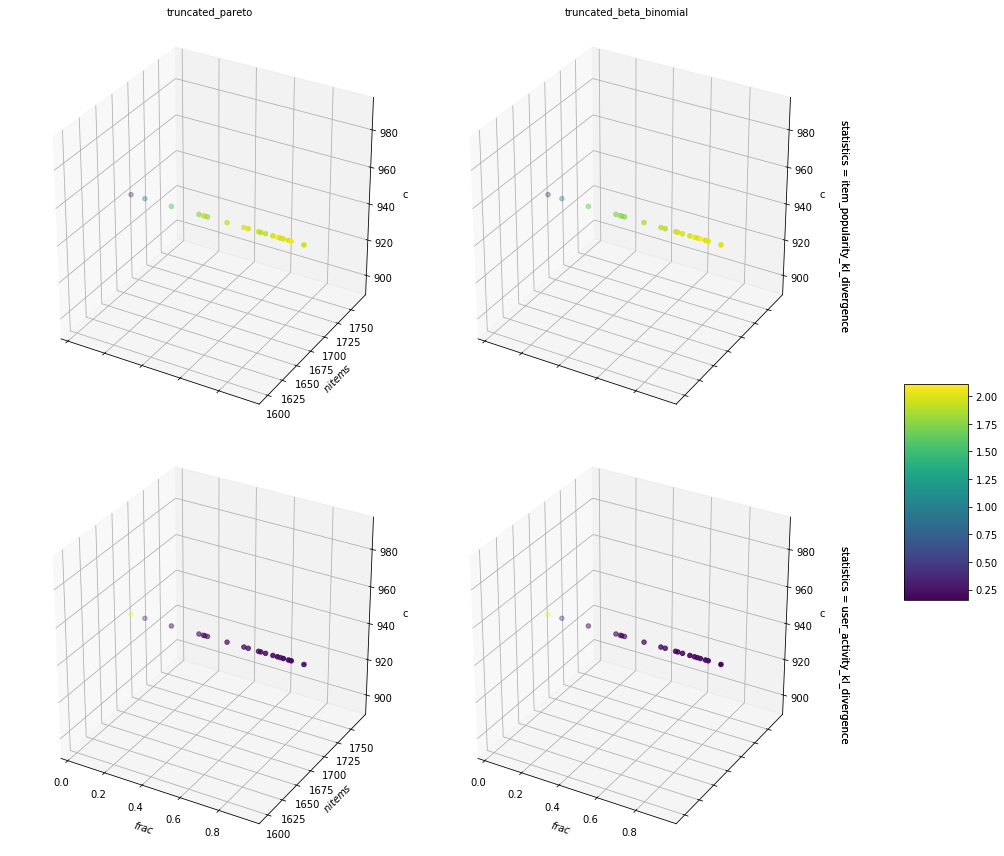

In [21]:
g = sns.FacetGrid(res_df_tall, col='obs_dist_func', row='statistics', height=6, margin_titles=True, subplot_kws=dict(projection='3d'))
g = (g.map(plot_scatter3d, 'pref_frac', 'pref_nitems', 'pref_nusers', 'score', cmap=cmap)
     .set_titles(col_template='{col_name}')
     .set_axis_labels(r'$frac$', r'$nitems$'))
cax = g.fig.add_axes([1.05, 0.3, 0.075, 0.25])
plt.colorbar(sm, cax=cax)

Generate simulated data using the best parameters

In [38]:
def simulated_data_bb(nusers=943, nitems=1682, frac=0.028862):
#     pref = generate_ibp_df(943, 1009.2, 0.3, 0.8)
    pref = generate_uniform(nusers, nitems, frac)
    obs = sample_popular_n(pref, truncated_beta_binomial, True, a=1.6638872003071793e-05, b=2.8157887296158077, n=737)
    return obs

In [39]:
def simulated_data_pareto(nusers=943, nitems=1682, frac=0.028862):
#     pref = generate_ibp_df(943, 1009.2, 10, 0)
    pref = generate_uniform(nusers, nitems, frac)
    obs = sample_popular_n(pref, truncated_pareto, True, m=20.00000045, alpha=0.510528)
    return obs

In [40]:
def simulated_data(name, *args, **kwargs):
    out = None
    if 'TBB' in name:
        out = simulated_data_bb(*args, **kwargs)
    if 'TP' in name:
        out = simulated_data_pareto(*args, **kwargs)
    return out

In [41]:
# def simulated_data_geo():
#     pref = generate_ibp_df(943, 1009, 1, 0)
#     obs = sample_popular_n(pref, np.random.geometric, False, p=0.05)
#     return obs

In [42]:
def compute_density(data):
    nusers = len(data['user'].unique())
    nitems = len(data['item'].unique())
    npairs = len(data)
    density = npairs / nitems / nusers
    return nusers, nitems, npairs, density

In [43]:
def compute_data_stats(data):
    pairs = data.loc[:, ['user', 'item']]
    user_activity = pairs.groupby('user', as_index=False).count().rename(columns={'item': 'count'})
    item_popularity = pairs.groupby('item', as_index=False).count().rename(columns={'user': 'count'})
    return user_activity, item_popularity

In [44]:
def summarize_dataset(name, data_func, *args, **kwargs):
    dataset = data_func(*args, **kwargs)
    colname = dataset.columns
    if not {'user', 'item'}.issubset(colname):
        dataset.rename(columns={colname[0]: 'user',
                                colname[1]: 'item'},
                       inplace=True)
    dataset = dataset[['user', 'item']]
    data_meta = compute_density(dataset)
    data_meta_stats = tuple([name, *data_meta])
    
    user_activity, item_popularity = compute_data_stats(dataset)
    user_activity['dataset'] = name
    user_activity.drop('user', axis=1, inplace=True)
    item_popularity['dataset'] = name
    item_popularity.drop('item', axis=1, inplace=True)
    item_popularity['rank'] = item_popularity['count'].rank(method='min', ascending=False)

    user_activity_stats = user_activity['count'].rename(name).describe()
    item_popularity_stats = item_popularity['count'].rename(name).describe()
    return data_meta_stats, user_activity_stats, item_popularity_stats, user_activity, item_popularity

In [45]:
res_df['distance'] = res_df['item_popularity_kl_divergence'] ** 2 + res_df['user_activity_kl_divergence'] ** 2

In [46]:
res_df.head()

,item_popularity_kl_divergence,obs,obs_a,obs_alpha,obs_b,obs_dist_func,obs_m,obs_n,obs_use_cap,pref,pref_frac,pref_nitems,pref_nusers,user_activity_kl_divergence,distance
0,1.736254,sample_popular_n,NaN,0.510528,NaN,truncated_pareto,20.0,NaN,True,generate_uniform,0.028862,1682,943,0.485717,3.250501
1,1.757043,sample_popular_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_uniform,0.028862,1682,943,0.511623,3.348959
2,1.880706,sample_popular_n,NaN,0.510528,NaN,truncated_pareto,20.0,NaN,True,generate_uniform,0.104553,1682,943,0.192035,3.573934
3,1.874749,sample_popular_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_uniform,0.104553,1682,943,0.191626,3.551406
4,2.009686,sample_popular_n,NaN,0.510528,NaN,truncated_pareto,20.0,NaN,True,generate_uniform,0.247550,1682,943,0.165041,4.066077


In [47]:
res_params = res_df[['obs_dist_func', 'pref_nusers', 'pref_nitems', 'pref_frac', 'item_popularity_kl_divergence', 'user_activity_kl_divergence', 'distance']]

In [48]:
res_params.head()

,obs_dist_func,pref_nusers,pref_nitems,pref_frac,item_popularity_kl_divergence,user_activity_kl_divergence,distance
0,truncated_pareto,943,1682,0.028862,1.736254,0.485717,3.250501
1,truncated_beta_binomial,943,1682,0.028862,1.757043,0.511623,3.348959
2,truncated_pareto,943,1682,0.104553,1.880706,0.192035,3.573934
3,truncated_beta_binomial,943,1682,0.104553,1.874749,0.191626,3.551406
4,truncated_pareto,943,1682,0.247550,2.009686,0.165041,4.066077


In [49]:
NPARAMS = 10
ip_params = res_params.sort_values(['obs_dist_func', 'item_popularity_kl_divergence']).groupby('obs_dist_func').head(NPARAMS)
ua_params = res_params.sort_values(['obs_dist_func', 'user_activity_kl_divergence']).groupby('obs_dist_func').head(NPARAMS)
d_params = res_params.sort_values(['obs_dist_func', 'distance']).groupby('obs_dist_func').head(NPARAMS)

In [50]:
from itertools import repeat

In [51]:
def summarize_datasets(params):
    from multiprocessing import Pool
    params = params.join(params.groupby('obs_dist_func').cumcount().rename('param_no'))
    params['name'] = params['obs_dist_func'].map(lambda x: ''.join(next(zip(*x.split('_')))).upper()) + params['param_no'].map(str)
    params = zip(params['name'].values, repeat(simulated_data), 
                 *params[['name', 'pref_nusers', 'pref_nitems', 'pref_frac']].to_dict('list').values()) 
    with Pool(10) as p:
        results = p.starmap(summarize_dataset, params)
    simulated_results = zip(*results)
    ml_100k_results = summarize_dataset('ml_100k', ml_100k)
    df = pd.DataFrame.from_records([ml_100k_results[0], *next(simulated_results)],
                               columns=['dataset', 'nusers', 'nitems', 'npairs', 'density'])
    print('dataset stats')
    print(df)

    df = pd.concat([ml_100k_results[1], *next(simulated_results)], axis=1)
    print('user profile stats')
    print(df)

    df = pd.concat([ml_100k_results[2], *next(simulated_results)], axis=1)
    print('item popularity stats')
    print(df)

    user_profile_df = pd.concat(next(simulated_results), axis=0, ignore_index=True)

    item_popularity_df = pd.concat(next(simulated_results), axis=0, ignore_index=True)
    return ml_100k_results[3:], user_profile_df, item_popularity_df

#### Top10 parameters sorted by item popularity KL

In [52]:
ml_100k_results, user_profile_df, item_popularity_df = summarize_datasets(ip_params)

dataset stats
    dataset  nusers  nitems  npairs   density
0   ml_100k     943    1682  100000  0.063047
1      TBB0     943    1682   39773  0.025076
2      TBB1     943    1682   83427  0.052598
3      TBB2     943    1682  102396  0.064557
4      TBB3     943    1682  104406  0.065825
5      TBB4     943    1682  104406  0.065825
6      TBB5     943    1682  104406  0.065825
7      TBB6     943    1682  104406  0.065825
8      TBB7     943    1682  104406  0.065825
9      TBB8     943    1682  104406  0.065825
10     TBB9     943    1682  104406  0.065825
11      TP0     943    1682   38424  0.024225
12      TP1     943    1682   75034  0.047306
13      TP2     943    1682   97381  0.061396
14      TP3     943    1682  110576  0.069715
15      TP4     943    1682  122884  0.077474
16      TP5     943    1682  106357  0.067055
17      TP6     943    1682  111557  0.070333
18      TP7     943    1682  114566  0.072230
19      TP8     943    1682  106357  0.067055
20      TP9     943 

In [53]:
def plot_scatter_against_baseline(*args, **kwargs):
    data = pd.concat(args, axis=1)
    data['dataset'] = kwargs.get('label')
    base = kwargs.pop('baseline')
    data = data.append(base[data.columns], ignore_index=True)
    args = map(lambda x: x.name, args)
    kwargs['label'] = data['dataset'].unique()
    ax = sns.scatterplot(*args, data=data, **kwargs)
    return ax

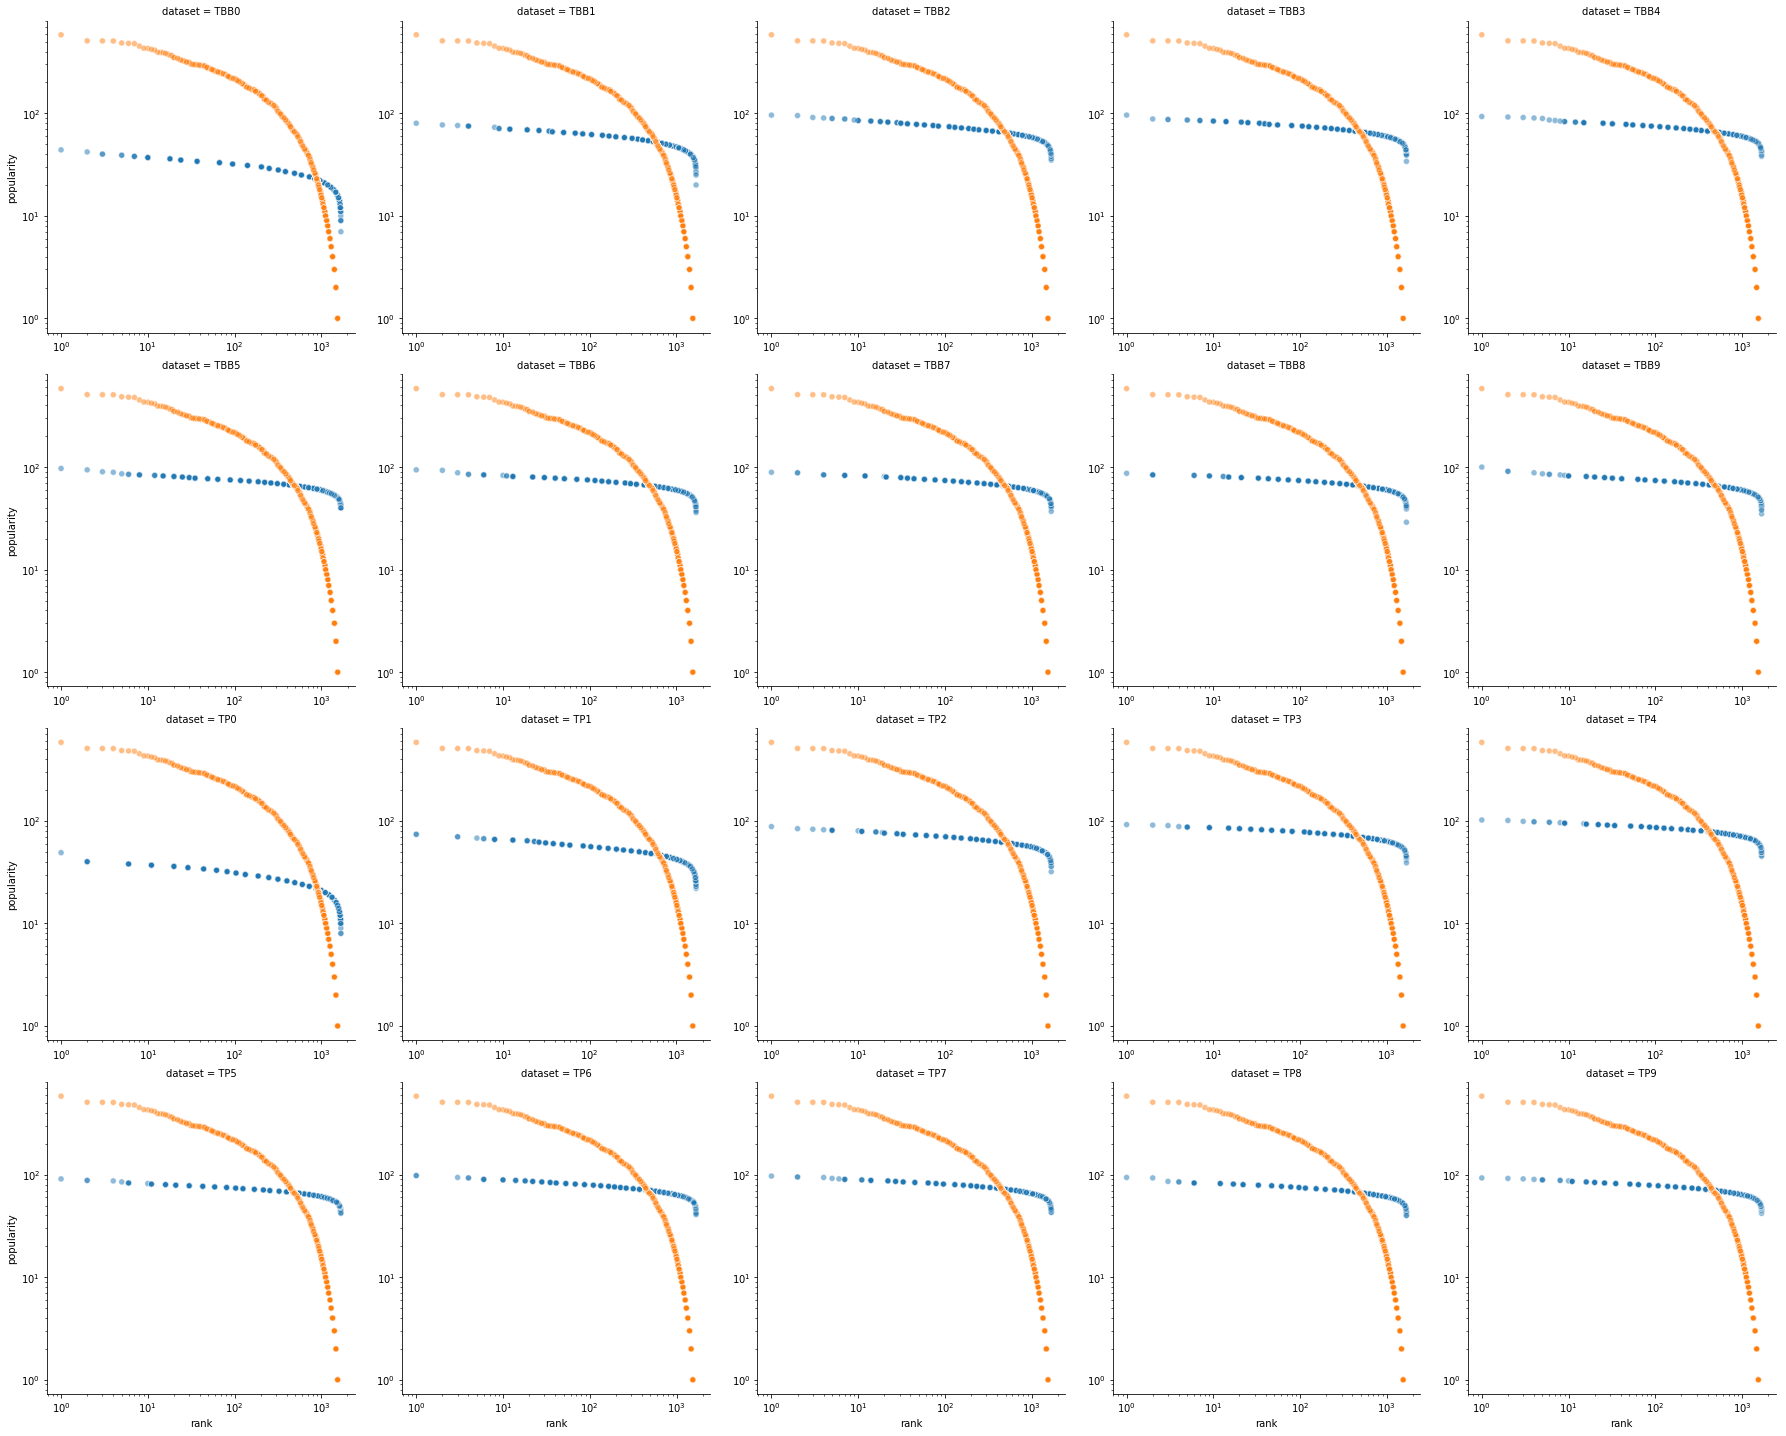

In [54]:
g = sns.FacetGrid(item_popularity_df, col='dataset', hue='dataset', sharex=False, sharey=False, col_wrap=5, height=5)
g = (g.map(plot_scatter_against_baseline, 'rank', 'count', hue='dataset', alpha=0.5, baseline=ml_100k_results[1])
     .set(xscale='log', yscale='log')
     .set_axis_labels('rank', 'popularity'))

In [55]:
popularity_counts = (item_popularity_df[['dataset', 'count']].groupby(['dataset', 'count'])
                     .size().reset_index().rename(columns={'count': 'popularity', 0: 'count'}))
ml_100k_pop_counts = (ml_100k_results[1][['dataset', 'count']].groupby(['dataset', 'count'])
                      .size().reset_index().rename(columns={'count': 'popularity', 0: 'count'}))

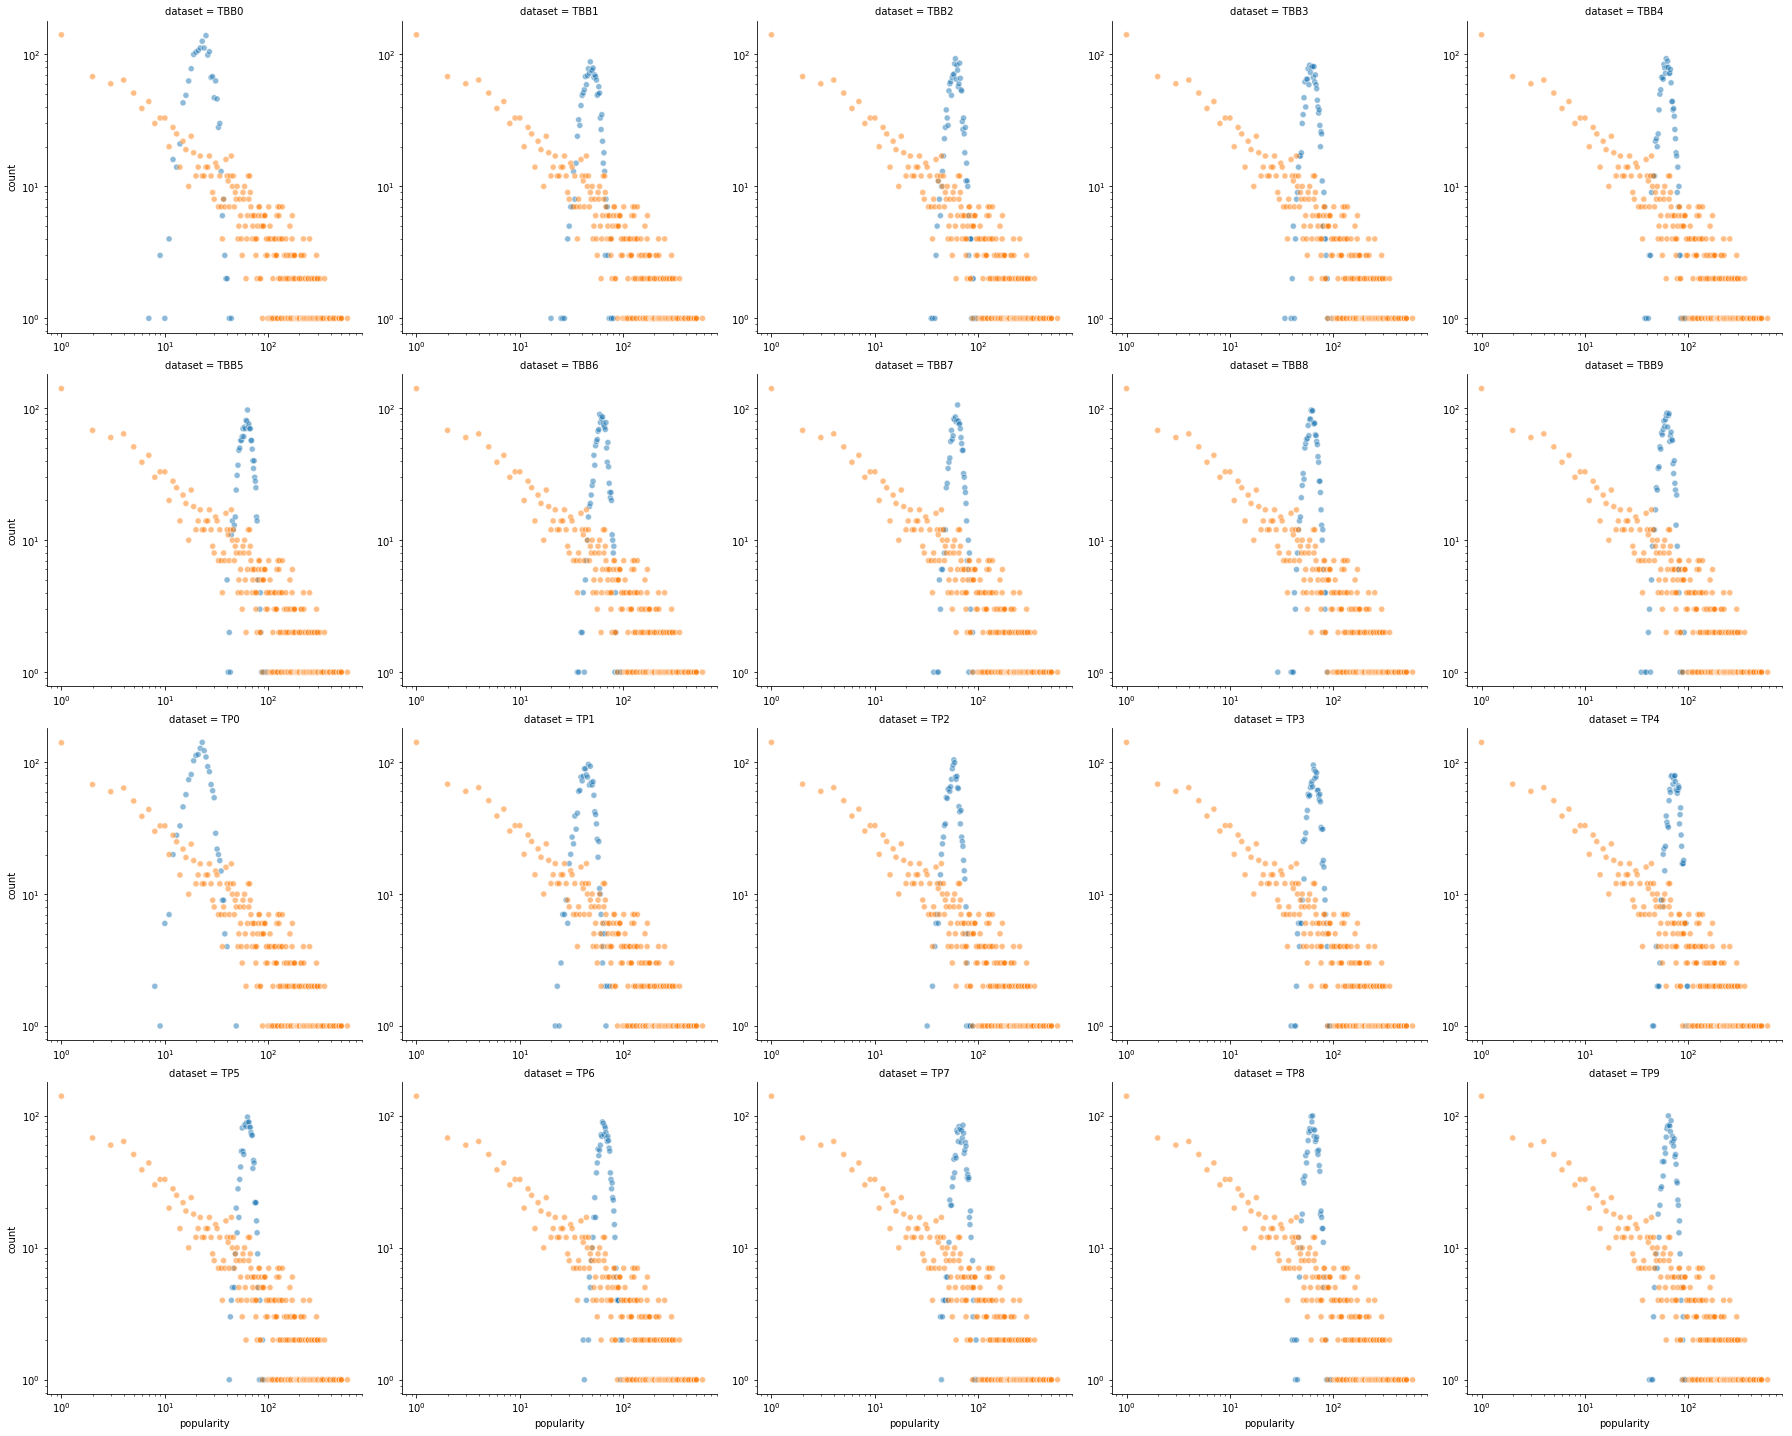

In [56]:
g = sns.FacetGrid(popularity_counts, col='dataset', hue='dataset', sharex=False, sharey=False, col_wrap=5, height=5)
g = (g.map(plot_scatter_against_baseline, 'popularity', 'count', hue='dataset', alpha=0.5, baseline=ml_100k_pop_counts)
     .set(xscale='log', yscale='log'))

#### Top10 parameters sorted by user activity KL

In [57]:
ml_100k_results, user_profile_df, item_popularity_df = summarize_datasets(ua_params)

dataset stats
    dataset  nusers  nitems  npairs   density
0   ml_100k     943    1682  100000  0.063047
1      TBB0     943    1682  102396  0.064557
2      TBB1     943    1682  104406  0.065825
3      TBB2     943    1682  104406  0.065825
4      TBB3     943    1682  104406  0.065825
5      TBB4     943    1682  104406  0.065825
6      TBB5     943    1682  104406  0.065825
7      TBB6     943    1682  104406  0.065825
8      TBB7     943    1682  104406  0.065825
9      TBB8     943    1682  104406  0.065825
10     TBB9     943    1682  104406  0.065825
11      TP0     943    1682  103682  0.065368
12      TP1     943    1682  122905  0.077488
13      TP2     943    1682  111589  0.070353
14      TP3     943    1682  106357  0.067055
15      TP4     943    1682  111588  0.070353
16      TP5     943    1682  106135  0.066915
17      TP6     943    1682  106295  0.067015
18      TP7     943    1682  108556  0.068441
19      TP8     943    1682  108593  0.068464
20      TP9     943 

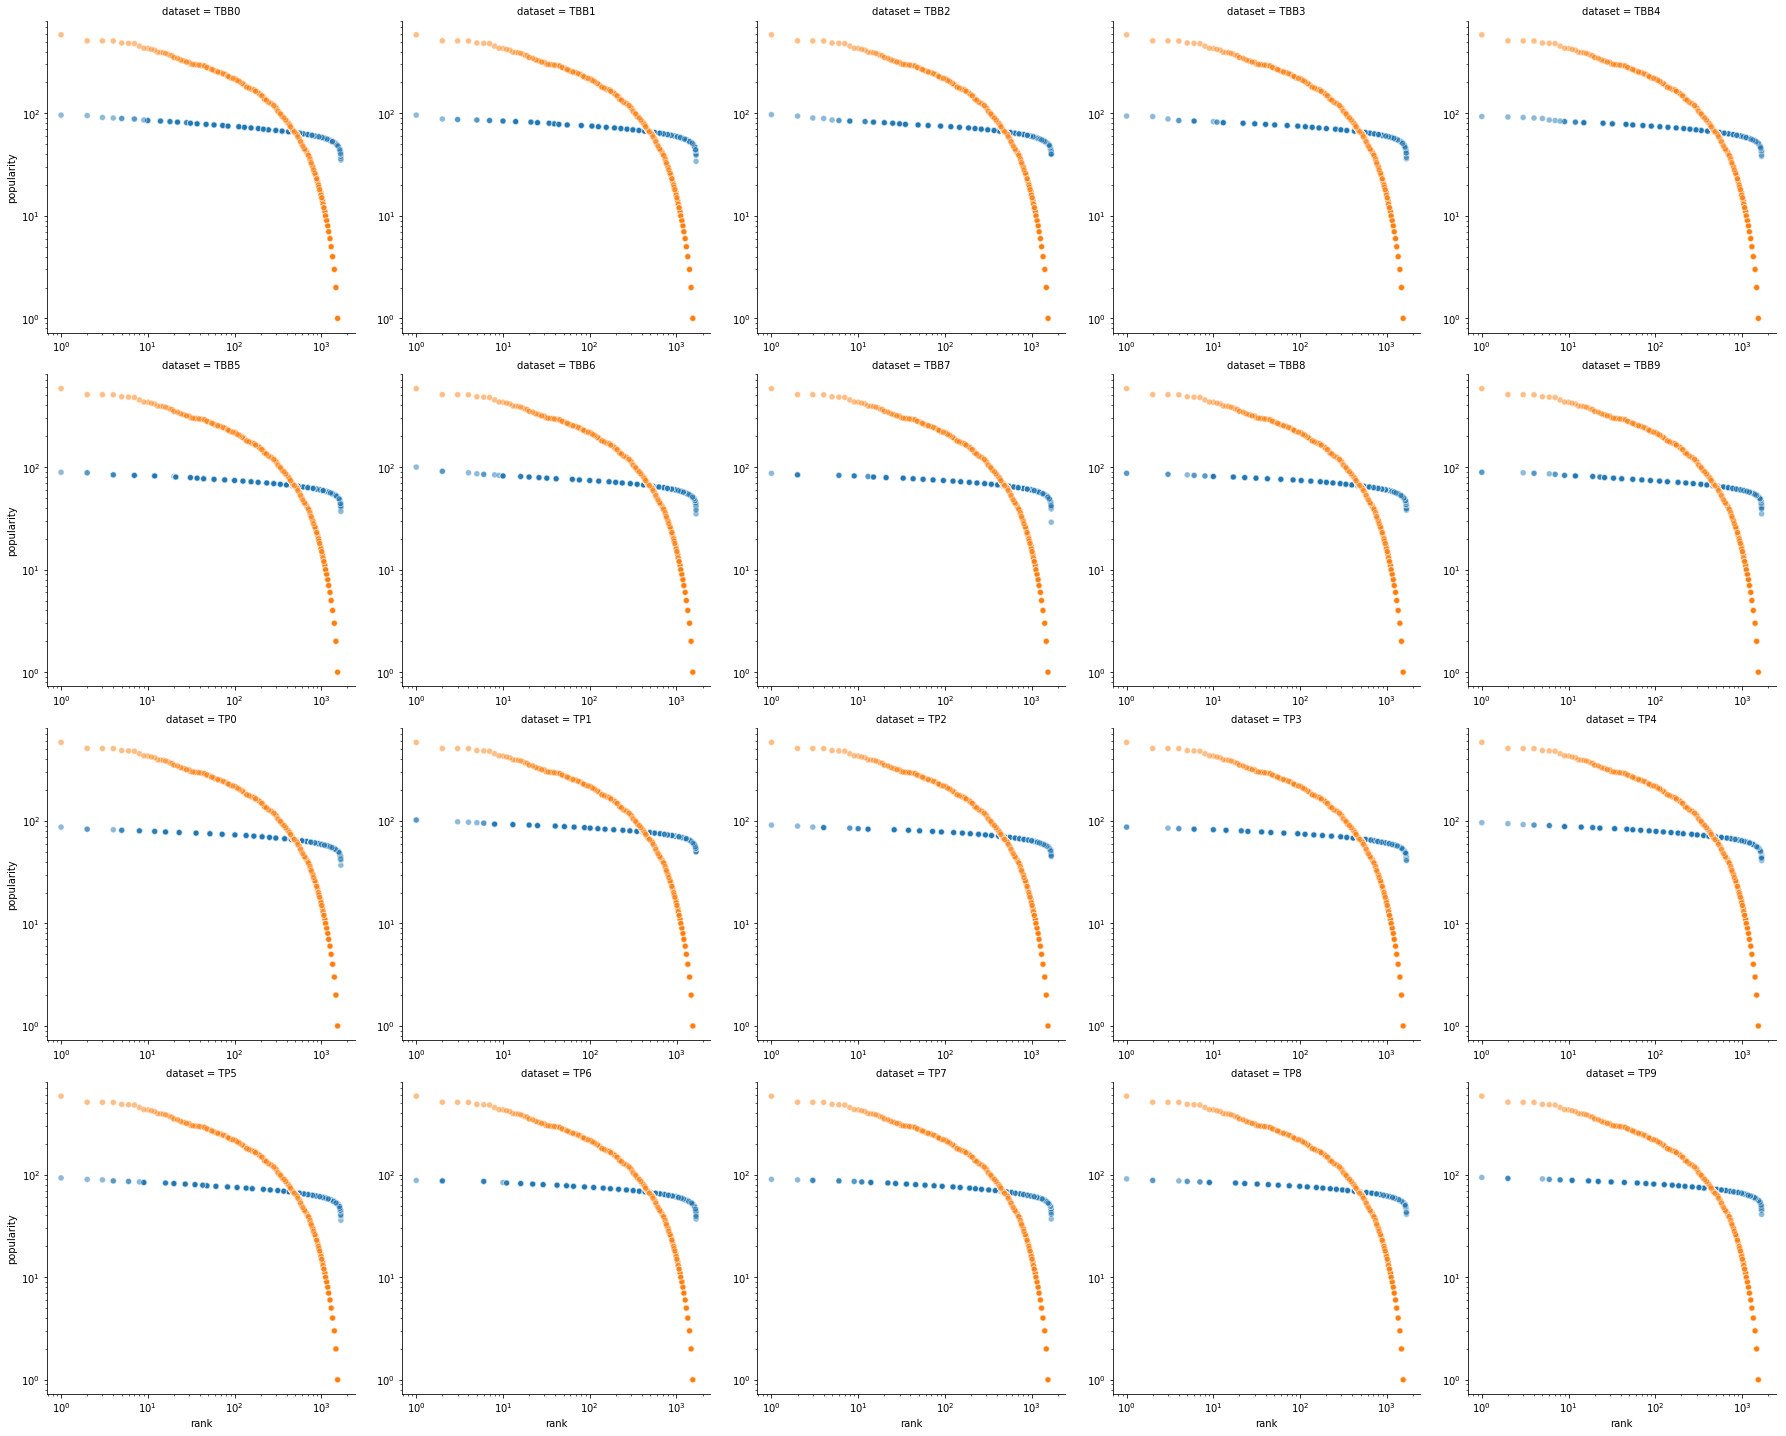

In [58]:
g = sns.FacetGrid(item_popularity_df, col='dataset', hue='dataset', sharex=False, sharey=False, col_wrap=5, height=5)
g = (g.map(plot_scatter_against_baseline, 'rank', 'count', hue='dataset', alpha=0.5, baseline=ml_100k_results[1])
     .set(xscale='log', yscale='log')
     .set_axis_labels('rank', 'popularity'))

In [59]:
popularity_counts = (item_popularity_df[['dataset', 'count']].groupby(['dataset', 'count'])
                     .size().reset_index().rename(columns={'count': 'popularity', 0: 'count'}))
ml_100k_pop_counts = (ml_100k_results[1][['dataset', 'count']].groupby(['dataset', 'count'])
                      .size().reset_index().rename(columns={'count': 'popularity', 0: 'count'}))

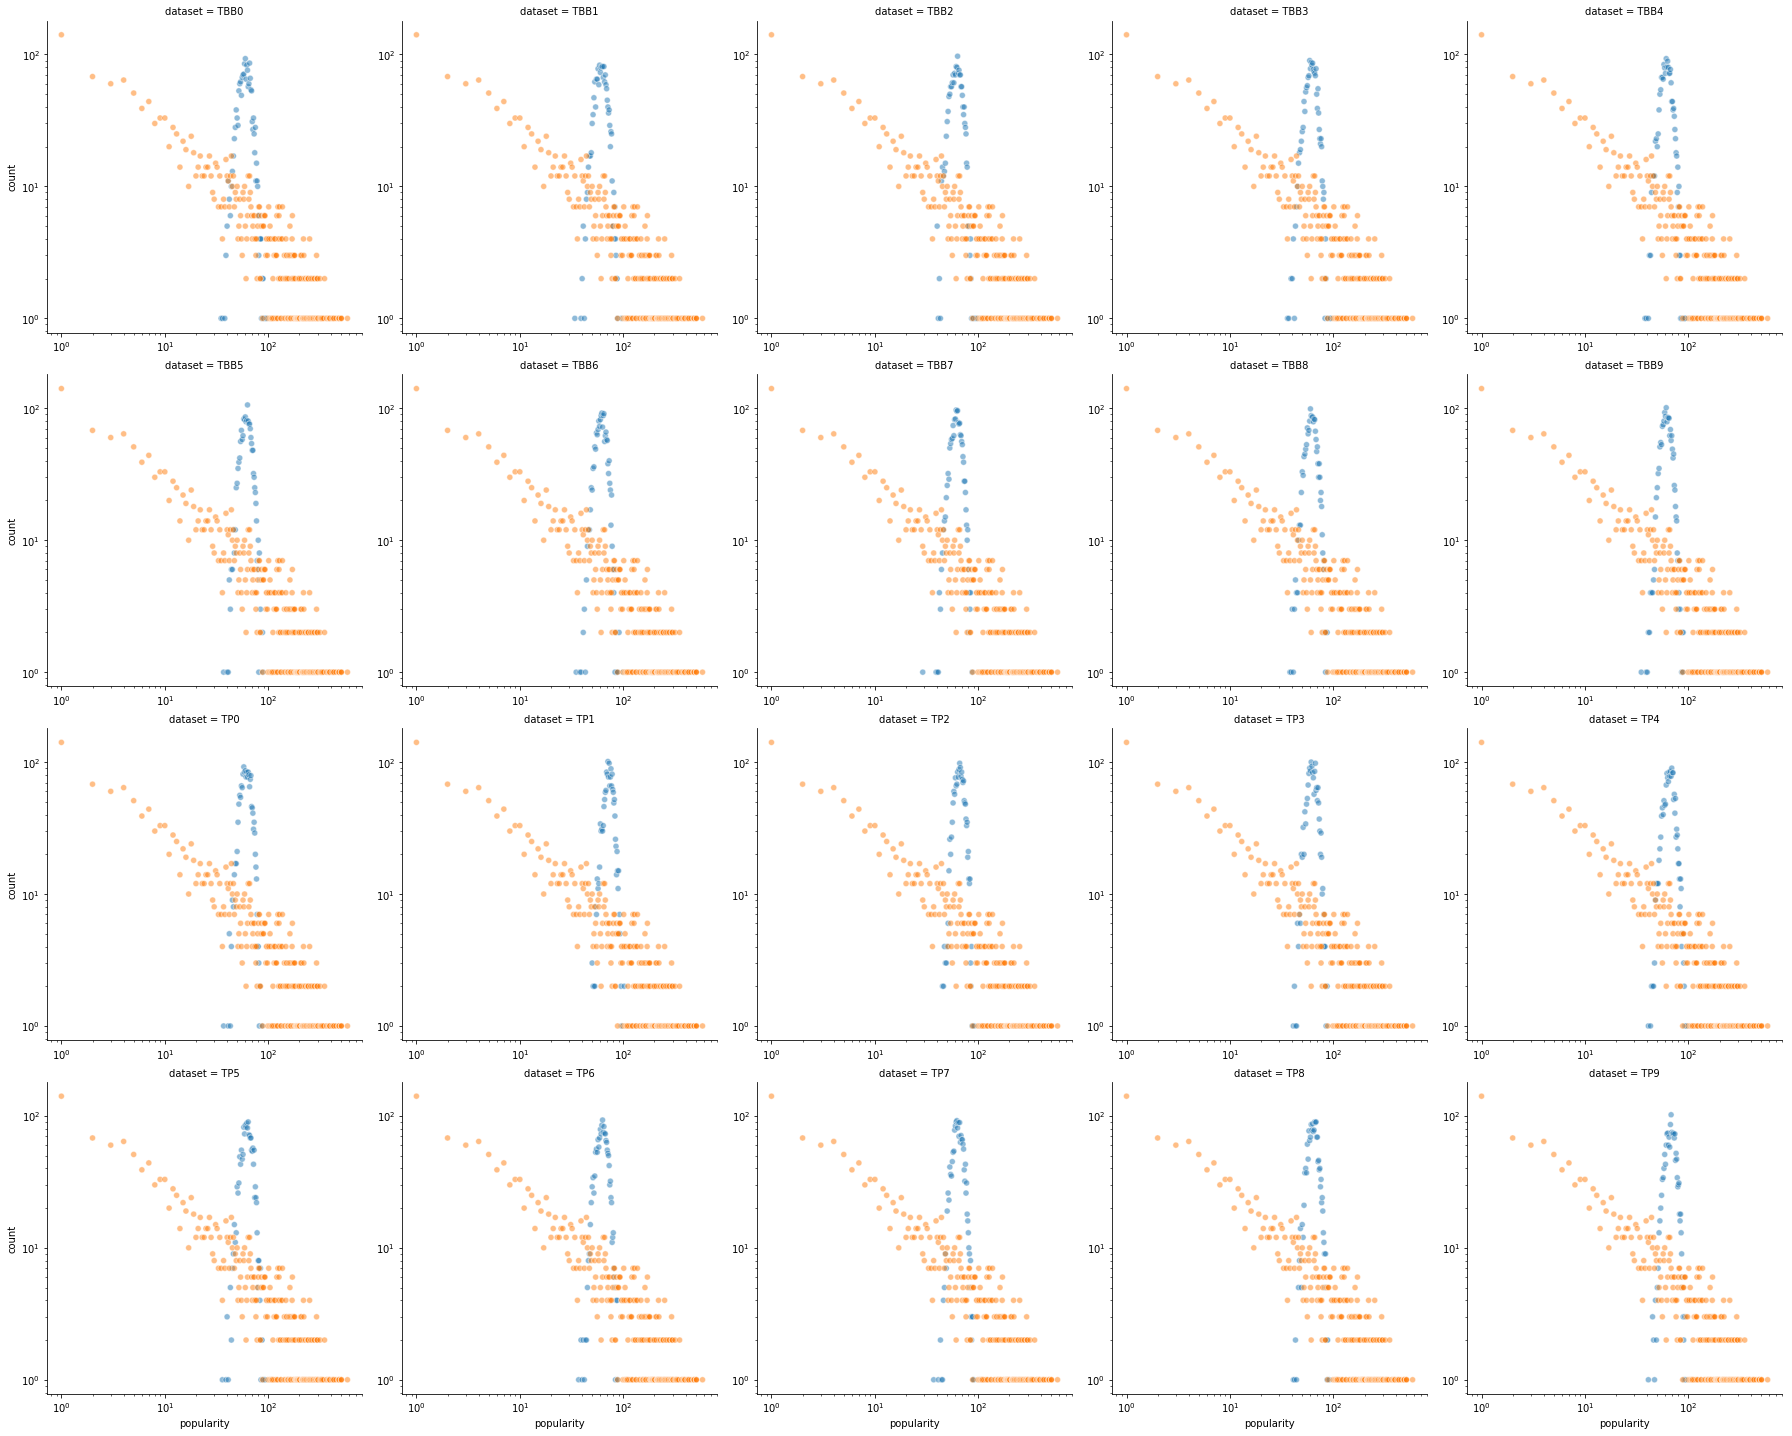

In [60]:
g = sns.FacetGrid(popularity_counts, col='dataset', hue='dataset', sharex=False, sharey=False, col_wrap=5, height=5)
g = (g.map(plot_scatter_against_baseline, 'popularity', 'count', hue='dataset', alpha=0.5, baseline=ml_100k_pop_counts)
     .set(xscale='log', yscale='log'))

#### Top10 parameters sorted by sum of squares of item popularity and user activity KL

In [61]:
ml_100k_results, user_profile_df, item_popularity_df = summarize_datasets(d_params)

dataset stats
    dataset  nusers  nitems  npairs   density
0   ml_100k     943    1682  100000  0.063047
1      TBB0     943    1682   39773  0.025076
2      TBB1     943    1682   83427  0.052598
3      TBB2     943    1682  102396  0.064557
4      TBB3     943    1682  104406  0.065825
5      TBB4     943    1682  104406  0.065825
6      TBB5     943    1682  104406  0.065825
7      TBB6     943    1682  104406  0.065825
8      TBB7     943    1682  104406  0.065825
9      TBB8     943    1682  104406  0.065825
10     TBB9     943    1682  104406  0.065825
11      TP0     943    1682   38492  0.024268
12      TP1     943    1682   77548  0.048891
13      TP2     943    1682  106263  0.066995
14      TP3     943    1682  111130  0.070064
15      TP4     943    1682  103682  0.065368
16      TP5     943    1682  122905  0.077488
17      TP6     943    1682  106295  0.067015
18      TP7     943    1682  106261  0.066994
19      TP8     943    1682  111589  0.070353
20      TP9     943 

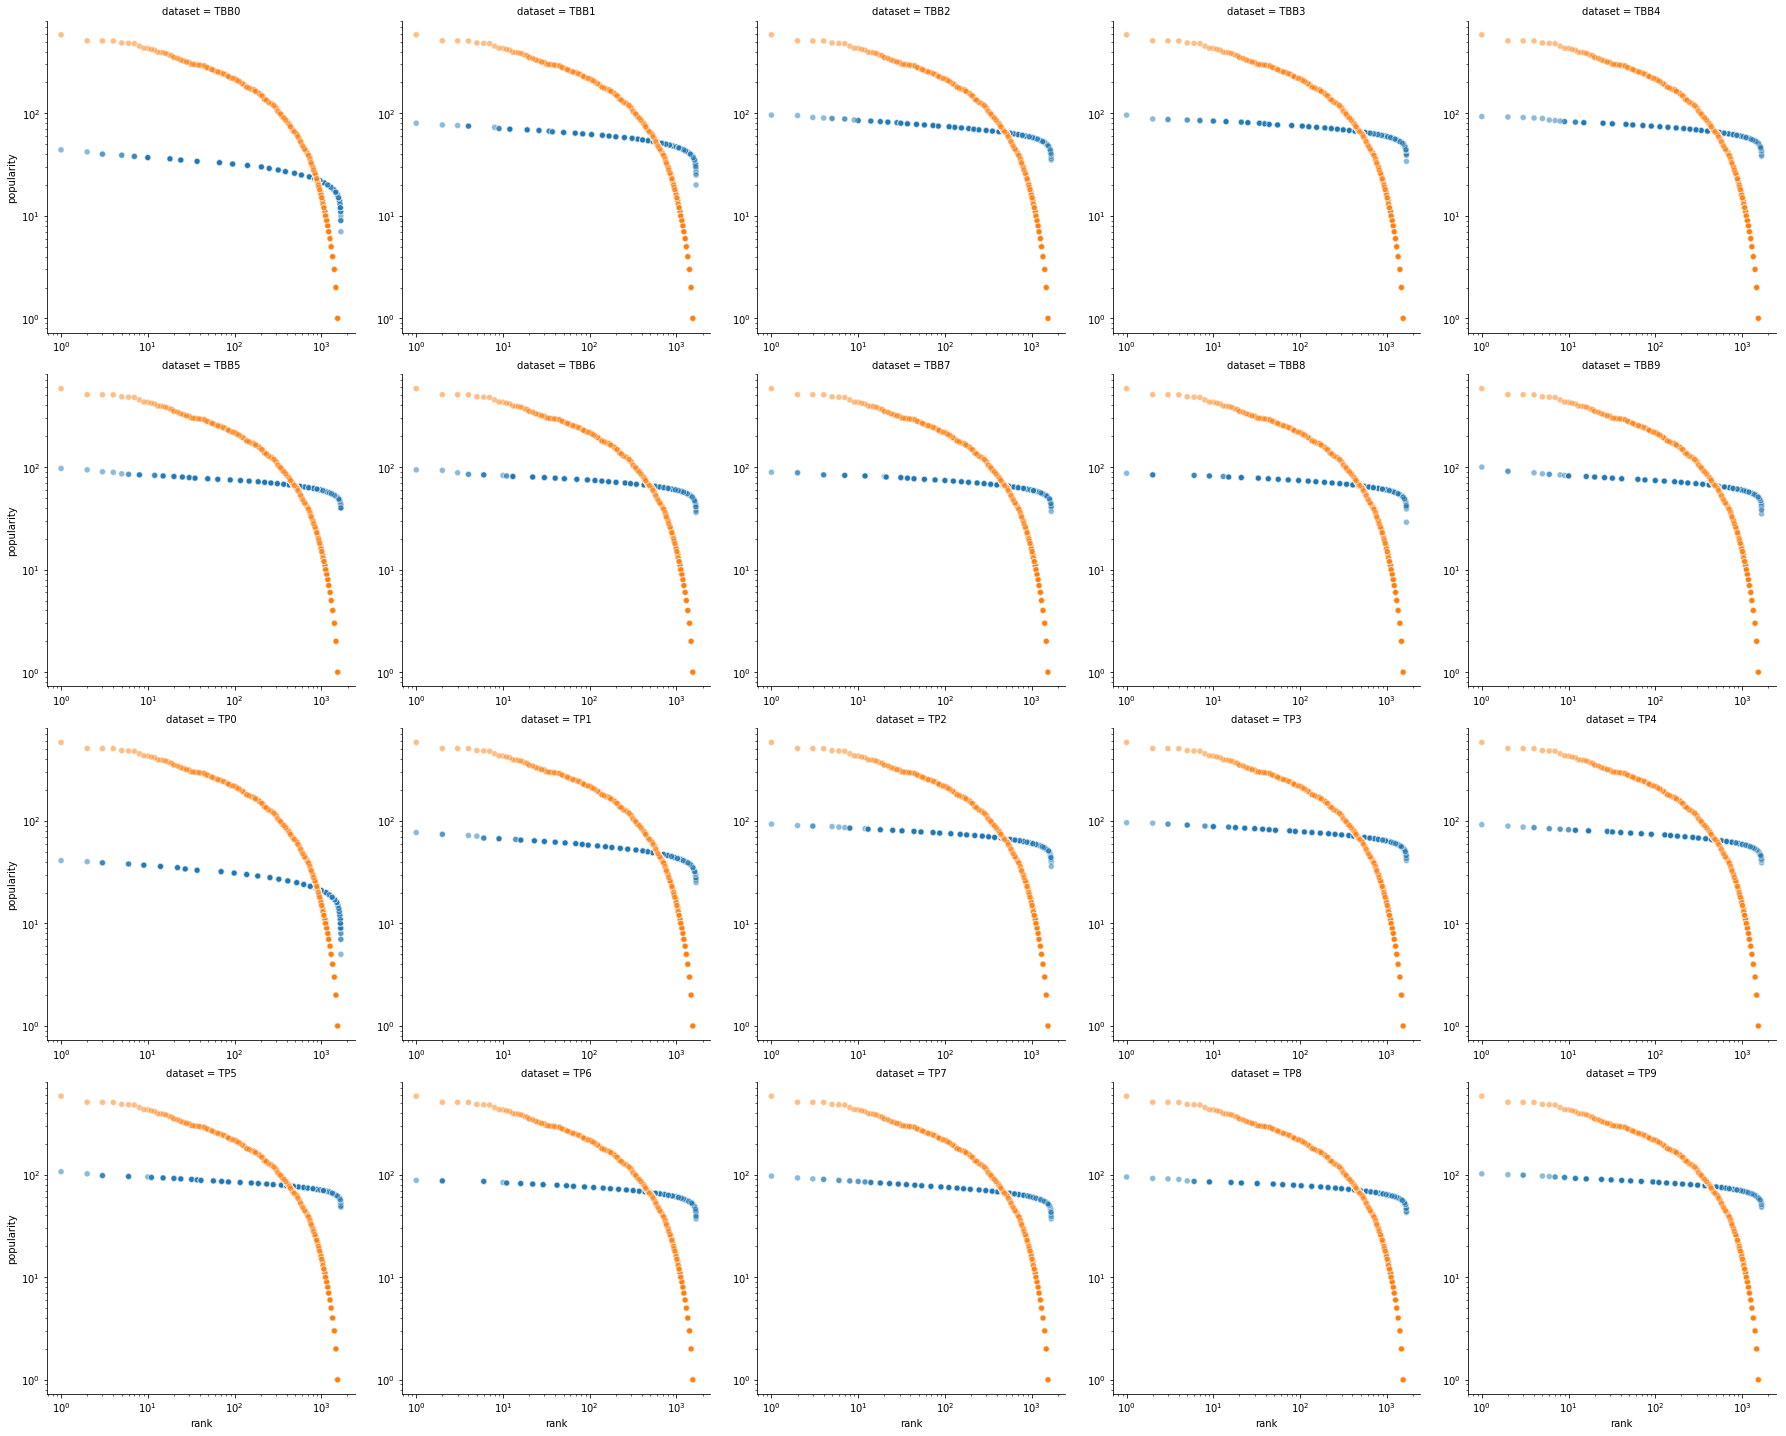

In [62]:
g = sns.FacetGrid(item_popularity_df, col='dataset', hue='dataset', sharex=False, sharey=False, col_wrap=5, height=5)
g = (g.map(plot_scatter_against_baseline, 'rank', 'count', hue='dataset', alpha=0.5, baseline=ml_100k_results[1])
     .set(xscale='log', yscale='log')
     .set_axis_labels('rank', 'popularity'))

In [63]:
popularity_counts = (item_popularity_df[['dataset', 'count']].groupby(['dataset', 'count'])
                     .size().reset_index().rename(columns={'count': 'popularity', 0: 'count'}))
ml_100k_pop_counts = (ml_100k_results[1][['dataset', 'count']].groupby(['dataset', 'count'])
                      .size().reset_index().rename(columns={'count': 'popularity', 0: 'count'}))

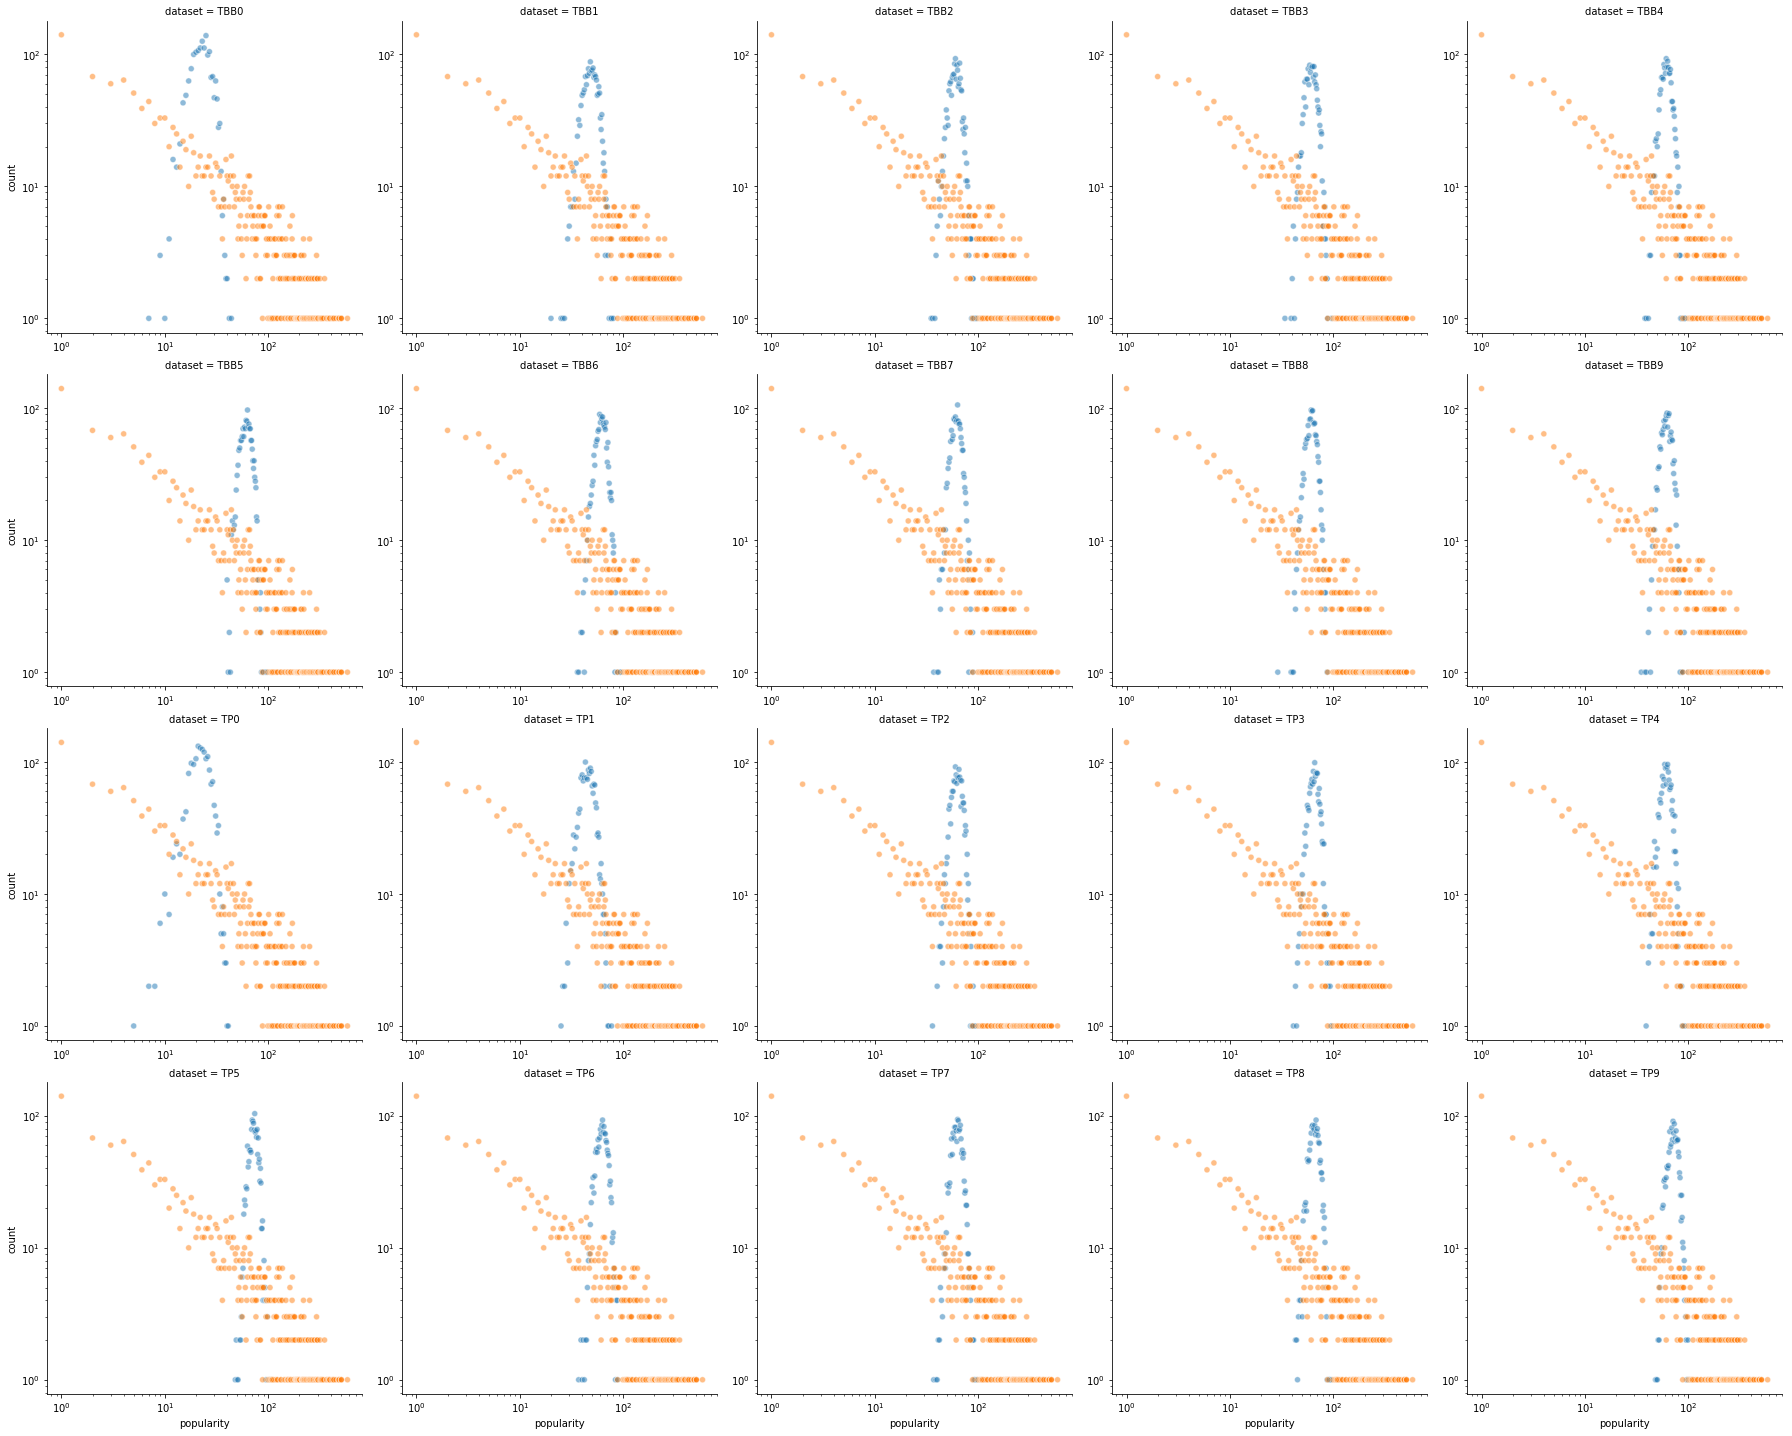

In [64]:
g = sns.FacetGrid(popularity_counts, col='dataset', hue='dataset', sharex=False, sharey=False, col_wrap=5, height=5)
g = (g.map(plot_scatter_against_baseline, 'popularity', 'count', hue='dataset', alpha=0.5, baseline=ml_100k_pop_counts)
     .set(xscale='log', yscale='log'))

In [65]:
user_profile_model1 = user_profile_df[user_profile_df['dataset'].isin(['ml_100k', 'simulated_beta_binomail'])].copy()
user_profile_model1['group'] = 1
user_profile_model2 = user_profile_df[user_profile_df['dataset'].isin(['ml_100k', 'simulated_pareto'])].copy()
user_profile_model2['group'] = 2
user_profile_models = pd.concat([user_profile_model1, user_profile_model2])

In [ ]:
g = sns.FacetGrid(user_profile_models.groupby(['group', 'dataset', 'item'], as_index=False).count().sort_values(['group', 'dataset', 'item']), col='group', hue='dataset', height=6)
g = (g.map(sns.scatterplot, 'item', 'user', alpha=0.7)
     .add_legend()
     .set_axis_labels('user profile size', 'number of users'))

In [ ]:
g = sns.FacetGrid(user_profile_models, col='group', hue='dataset', height=6)
g = (g.map(sns.distplot, 'item', kde=False)
     .add_legend()
     .set_axis_labels('user profile size', 'number of users'))
plt.show()

In [58]:
item_popularity_df.head()

,item,user,dataset,rank
0,1,452,ml_100k,8.0
1,2,131,ml_100k,239.0
2,3,90,ml_100k,372.0
3,4,209,ml_100k,107.0
4,5,86,ml_100k,388.0


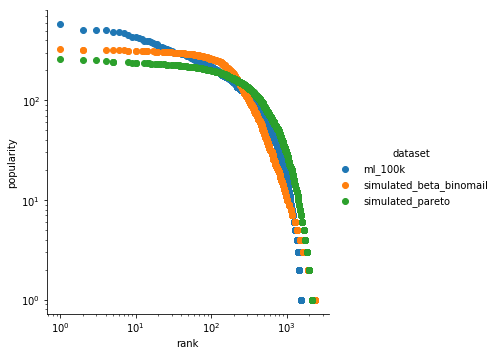

In [59]:
g = sns.FacetGrid(item_popularity_df, hue='dataset', height=5)
g = (g.map(plt.scatter, 'rank', 'user')
     .set(xscale='log', yscale='log')
     .set_axis_labels('rank', 'popularity')
     .add_legend())

In [60]:
count_popularity.head()

,dataset,user,count
0,ml_100k,1,141
1,ml_100k,2,68
2,ml_100k,3,60
3,ml_100k,4,64
4,ml_100k,5,51


In [50]:
count_popularity_model1 = count_popularity[count_popularity['dataset'].isin(['ml_100k', 'simulated_beta_binomail'])].copy()
count_popularity_model1['group'] = 1
count_popularity_model2 = count_popularity[count_popularity['dataset'].isin(['ml_100k', 'simulated_pareto'])].copy()
count_popularity_model2['group'] = 2
count_popularity_models = pd.concat([count_popularity_model1, count_popularity_model2])

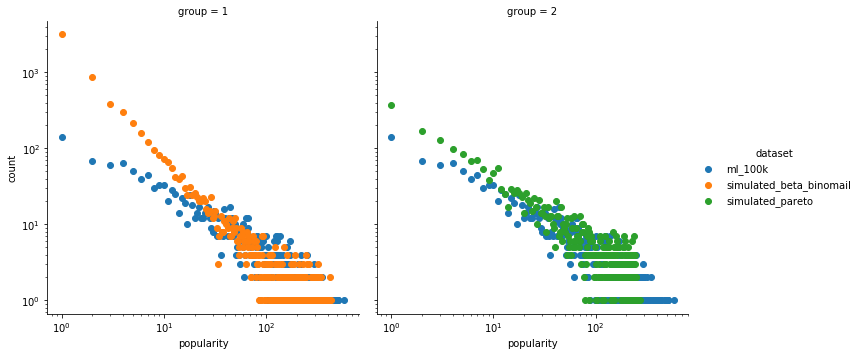

In [51]:
g = sns.FacetGrid(count_popularity_models, col='group', hue='dataset', height=5)
g = (g.map(plt.scatter, 'user', 'count')
     .set(xscale='log', yscale='log')
     .set_axis_labels('popularity', 'count').add_legend())

In [246]:
from scipy.stats import entropy

In [247]:
tall_popularity_count = count_popularity_model1.pivot_table(index='user', columns='dataset', values='count')

In [248]:
p = np.ones(max(tall_popularity_count['ml_100k'].dropna().index))

In [249]:
p[tall_popularity_count['ml_100k'].dropna().index.values - 1] += tall_popularity_count['ml_100k'].dropna().values

In [250]:
p /= p.sum()

In [251]:
q = np.ones(max(tall_popularity_count['simulated_beta_binomail'].dropna().index))

In [252]:
q[tall_popularity_count['simulated_beta_binomail'].dropna().index.values - 1] += tall_popularity_count['simulated_beta_binomail'].dropna().values

In [253]:
q /= q.sum()

In [254]:
lb = min(len(q), len(p))

In [255]:
entropy(q[:lb], p[:lb])

0.09075708186382384

In [256]:
tall_popularity_count = count_popularity_model1.pivot_table(index='user', columns='dataset', values='count', fill_value=0)

In [257]:
p = tall_popularity_count['ml_100k'] + 1

In [258]:
p /= p.sum()

In [259]:
q = tall_popularity_count['simulated_beta_binomail'] + 1

In [260]:
q /= q.sum()

In [261]:
entropy(q, p)

0.23545846119972072